In [2]:
import torch
from torchvision import transforms
import matplotlib.pyplot as plt
import os
import tarfile
import glob
from PIL import Image
from torch.utils.data import Dataset

In [6]:

#Extract images
current_dir = os.getcwd()

images_tar_path = os.path.join(current_dir, 'images.tar.gz')
extracted_images_dir = os.path.join(current_dir, 'Extracted_images')
os.makedirs(extracted_images_dir, exist_ok=True)
with tarfile.open(images_tar_path, 'r:gz') as tar:
    tar.extractall(path=extracted_images_dir)

#Extract annotations
annotations_tar_path = os.path.join(current_dir, 'annotations.tar.gz')
extracted_annotations_dir = os.path.join(current_dir, 'Extracted_annotations')
os.makedirs(extracted_annotations_dir, exist_ok=True)
with tarfile.open(annotations_tar_path, 'r:gz') as tar:
        tar.extractall(extracted_annotations_dir)


In [3]:
#Get images list
data_transform = transforms.Compose([transforms.Resize((128,128)),
                                transforms.ToTensor()])

to_pil = transforms.ToPILImage()

def pil_loader(path):
    with open(path, 'rb') as f:
        img = Image.open(f)
        return img.convert('RGB')

def extract_species_and_number(img_path):
    img_name = os.path.basename(img_path)
    species = img_name.rsplit('_', 1)[0].lower() 
    number = int(img_name.rsplit('_', 1)[1].split('.')[0])
    return (species, number)

class ImageDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.file_list = sorted(glob.glob(self.root_dir + "*.jpg"), key=extract_species_and_number )

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        img_name = self.file_list[idx]
        image = pil_loader(img_name)
        if self.transform:
            image = self.transform(image)
        return image
    
    def getname(self,idx):
        return self.file_list[idx]

    
data_imgs = ImageDataset(root_dir='./Extracted_images/images/',
            transform=data_transform)
print(len(data_imgs))

7349


In [4]:
#Get annotations list
#Element from annotation file are not in the same order that the images
#We have to sort the file before getting the information for each column
# Fonction de conversion pour extraire le nom d'espèce et le numéro de l'image

def extract_species_and_number(line):
    parts = line.split()
    species = parts[0].rsplit('_', 1)[0].lower()  # Extract name
    number = int(parts[0].rsplit('_', 1)[1])  # Extract number
    return (species, number)

#Init lists
image_names = []
class_ids = []
species_ids = []
breed_ids = []

# Read the annotation file and extract information
with open('./Extracted_annotations/annotations/list.txt', 'r') as file:
    lines = [line.strip() for line in file if not line.startswith("#")]
    sorted_lines = sorted(lines, key=extract_species_and_number)
    for line in sorted_lines:
        columns = line.split()
        image_names.append(columns[0])
        class_ids.append(int(columns[1]))
        species_ids.append(int(columns[2]))
        breed_ids.append(int(columns[3]))
print(len(image_names))

FileNotFoundError: [Errno 2] No such file or directory: './Extracted_annotations/annotations/list.txt'

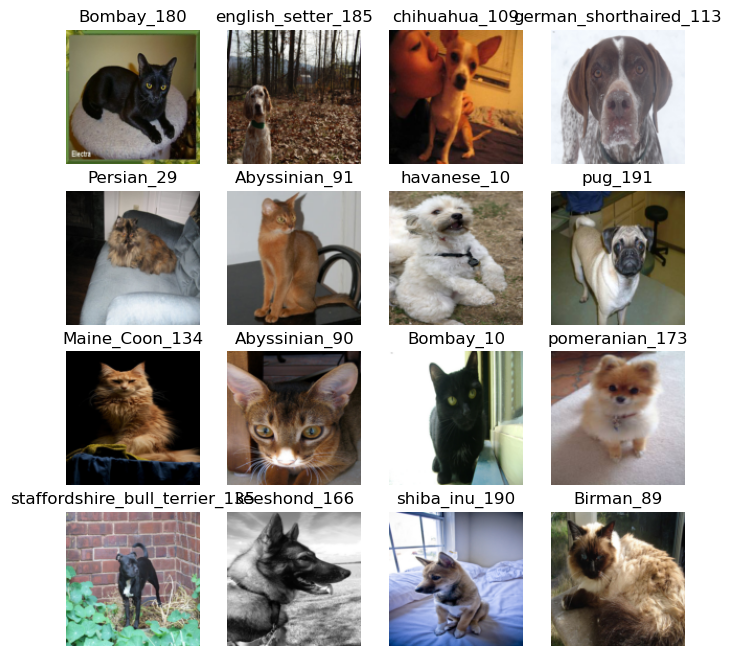

In [7]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 4,4
for i in range(0, cols * rows):
    sample_idx = torch.randint(len(data_imgs), size=(1,)).item()
    img= data_imgs[sample_idx]
    name = image_names[sample_idx]
    figure.add_subplot(rows, cols, i+1)
    plt.title(name)
    plt.axis("off")
    plt.imshow(to_pil(img))
plt.show()